# Naive Bayes

INFO 371 Winter 2019

Lab created by: Zening Qu

Deadline: 11:59pm Feb 26, 2019

In this lab we will build multinomial naive bayes classifiers to predict movie ratings (`fresh` or `rotten`) based on user quotes. The dataset can be downloaded at https://canvas.uw.edu/courses/1256537/files/54325781/download?download_frd=1 We will split the dataset into three subsets: train, validation, and test. We will perform cross-validation on the train and validation set to pick a good smoothing parameter alpha. Then, we will evaluate the model performance (classification accuracy) using the test dataset.

## Step 0: Load Dataset

First let's load the dataset and split it into train, validation, and test. The code is already written for you. Please feel free to `print` or explore the dataset on your own.

In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

def load_data():
    df = pd.read_csv("rotten-tomatoes.csv")
    df = df[df.fresh != 'none']
    y =  pd.get_dummies(df.fresh).fresh
    # split train, validation, and test set
    X_train, X_test, y_train, y_test = train_test_split(df.quote, y, test_size=0.1)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = load_data()


## Step 1: Naive Bayes

1.1 Let's vectorize the quotes by counting word frequencies and fit a Naive Bayes classifier on the *training* set. Because our features are discrete word counts, we will use `MultinomialNB` from `sklearn` (https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html). Please run the code below and report the train and validation accuracy (Hint: 92.6%, 77.3%).

1.2 The smoothing prior `alpha` accounts for features not present in the learning samples and prevents zero probabilities in further computations. Setting `alpha =1` is called *Laplace* smoothing; setting `alpha = 0.1` is called *Lidstone* smoothing, setting `alpha = 0` means no smoothing. Please set `alpha` to `0, 0.1, 1` in the code below and report the train and validation accuracy. Among the three parameter settings, which gives the best model performance (i.e., the highest validation accuracy)?

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

vectorizer = CountVectorizer(stop_words='english')
vectorizer = vectorizer.fit(X_train)

clf = MultinomialNB(alpha = 1) # todo: set alpha = 0, 0.1, 1

X_train_vec = vectorizer.transform(X_train).toarray()
clf.fit(X_train_vec, y_train)
print('train accuracy:', clf.score(X_train_vec, y_train))

X_val_vec = vectorizer.transform(X_val).toarray()
print('validation accuracy', clf.score(X_val_vec, y_val))

train accuracy: 0.9242800625632532
validation accuracy 0.7913907284768212


> The train accuracy is 92.6% and validation is 75.8% (with alpha = 1). From the 3 parameters for alpha, alpha = 1 gives the highest validation accuracy of 0.758.

## Step 2: Cross-Validation to Pick Smoothing Parameter

2.1 Now let's try 20 different `alpha` values. Please complete the code below and plot the train and validation accuracies against `alpha` values. Please plot two lines, put `alpha` on the x axis, train and validation accuracy on the y axis. Please use color blue for the train accuracy and orange for the validation accuracy.

2.2 Based on your plot, which `alpha` value is the best for model performance (i.e., pick the `alpha` with the best *validation* accuracy)? Report the optimal `alpha` and its train and validation accuracy.

In [68]:
alpha = np.arange(0,1.05,0.05)
# todo: fit clf on train, report train and validation accuracy
training = []
validation = []
for x in alpha:
    print("alpha:", alpha)
    clf = MultinomialNB(alpha = x) 

    X_train_vec = vectorizer.transform(X_train).toarray()
    clf.fit(X_train_vec, y_train)
    train_score = clf.score(X_train_vec, y_train)
    print('train accuracy', train_score)
    training.append(train_score)

    X_val_vec = vectorizer.transform(X_val).toarray()
    val_score = clf.score(X_val_vec, y_val)
    print('validation accuracy', val_score)
    validation.append(val_score)

    clf.fit(X_val_vec, y_val)
    

alpha: [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


train accuracy 0.9580458183825559
validation accuracy 0.7649006622516556
alpha: [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


train accuracy 0.9547336461495998
validation accuracy 0.7756622516556292
alpha: [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
train accuracy 0.9526175361118778
validation accuracy 0.777317880794702
alpha: [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
train accuracy 0.9504094212899071
validation accuracy 0.7839403973509934
alpha: [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
train accuracy 0.9485693256049315
validation accuracy 0.7831125827814569
alpha: [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
train accuracy 0.947465268193946
validation accuracy 0.7847682119205298
alpha: [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
train accuracy 0.9456251725089705
validation accuracy 0.781456

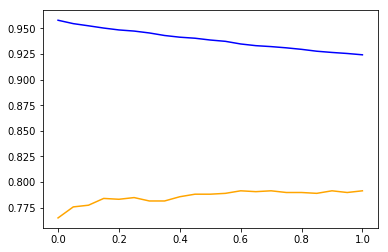

In [70]:
# todo: plot x = alpha, y = accuracy, color = [train, validation]
import matplotlib.pyplot as plt
plt.plot(alpha, training, color = 'blue')
plt.plot(alpha, validation, color = 'orange')



In [83]:
# combine train and validation to form a new train set
X_train_total = X_train.append(X_val)
y_train_total = y_train.append(y_val)

# todo: fit Naive Bayes classifier on X_train_total and y_train_total
clf = MultinomialNB(alpha = 1) # todo: set alpha = 0, 0.1, 1

X_train_vec = vectorizer.transform(X_train_total).toarray()
clf.fit(X_train_vec, y_train_total)
print('train accuracy:', clf.score(X_train_vec, y_train_total))

# todo: evaluate model performance on X_test and y_test, report test accuracy
X_val_vec = vectorizer.transform(X_val).toarray()
print('validation accuracy', clf.score(X_val_vec, y_val))

train accuracy: 0.9210068725676906
validation accuracy 0.9097682119205298


## Step 3: Evaluate on Test Set

3.1 With the optimal `alpha` you found in step 2, fit the Naive Bayes classifer on (train + validation) set and evaluate the model performance on the test set. Report the test accuracy. 

Note: After measuring test accuracy, do **not** change `alpha` any more. You should only change `alpha` during cross-validation (step 2). If you change `alpha` after looking at test acccuracy, you leak information from the test set to the model and your test accuracy will not be an unbiased estimator of the model's prediction accuracy any more!

In [84]:
clf = MultinomialNB(alpha = 0.95) 

X_train_vec = vectorizer.transform(X_train_total).toarray()
clf.fit(X_train_vec, y_train_total)
print('train accuracy:', clf.score(X_train_vec, y_train_total))

# todo: evaluate model performance on X_test and y_test, report test accuracy
X_val_vec = vectorizer.transform(X_val).toarray()
print('validation accuracy', clf.score(X_val_vec, y_val))

train accuracy: 0.9223317048935994
validation accuracy 0.9105960264900662
